In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)
train_dir     = '/home/asus/Desktop/Dataset_splits/train/'
test_dir      = '/home/asus/Desktop/Dataset_splits/validation/'
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(299, 299), \
                                                    batch_size=128, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(299, 299), \
                                                    batch_size=128, class_mode='categorical')

Found 22110 images belonging to 33 classes.
Found 4132 images belonging to 33 classes.


In [3]:

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)
# Get the output layer from the pre-trained Inception V3 model
x = base_model.output

# Now, add new layers that will be trained with our data
# These layers will be randomly initialized
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(33, activation='softmax')(x)

# Get the final Model to train
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers from the original base model so that we don't update the weights
for layer in base_model.layers:
    layer.trainable = False

In [4]:
adam = optimizers.adam(lr=0.001)
# Compile the new model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
# Setup a callback to save the best model
callbacks = [keras.callbacks.ModelCheckpoint('model.{epoch:02d}-{val_accuracy:.2f}.hdf5', monitor='val_accuracy',\
 verbose=1, save_best_only=True, mode='max', period=1)]

# Fit the data and output the history
history = model.fit_generator(train_generator, verbose=1, steps_per_epoch=len(train_generator), epochs=30, \
 validation_data=test_generator, validation_steps=len(test_generator), callbacks=callbacks)

Epoch 1/30
173/173 [==============================] - 2166s 13s/step - loss: 1.4632 - accuracy: 0.6210 - val_loss: 1.9371 - val_accuracy: 0.3928

Epoch 00001: val_accuracy improved from -inf to 0.39279, saving model to model.01-0.39.hdf5
Epoch 2/30
173/173 [==============================] - 2384s 14s/step - loss: 0.6670 - accuracy: 0.8033 - val_loss: 1.2925 - val_accuracy: 0.4622

Epoch 00002: val_accuracy improved from 0.39279 to 0.46225, saving model to model.02-0.46.hdf5
Epoch 3/30
173/173 [==============================] - 2217s 13s/step - loss: 0.5137 - accuracy: 0.8390 - val_loss: 2.1637 - val_accuracy: 0.4584

Epoch 00003: val_accuracy did not improve from 0.46225
Epoch 4/30
173/173 [==============================] - 2214s 13s/step - loss: 0.4419 - accuracy: 0.8591 - val_loss: 1.6824 - val_accuracy: 0.4598

Epoch 00004: val_accuracy did not improve from 0.46225
Epoch 5/30
173/173 [==============================] - 2353s 14s/step - loss: 0.3850 - accuracy: 0.8766 - val_loss: 1.51

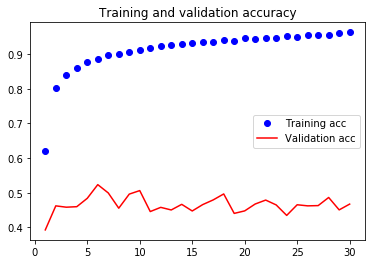

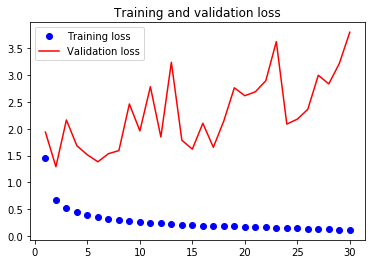

In [9]:
def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(accuracy) + 1)

    plt.figure()
    plt.title('Training and validation accuracy')
    plt.plot(epochs, accuracy, 'bo', label='Training acc')
    plt.plot(epochs, val_accuracy, 'b', color='red', label='Validation acc')
    plt.legend()
    plt.show()

    plt.figure()
    plt.title('Training and validation loss')
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', color='red', label='Validation loss')
    plt.legend()
    plt.show()
    return accuracy, val_accuracy, loss, val_loss

accuracy, val_accuracy, loss, val_loss = plot_history(history)

In [10]:
model.save('inception.h5')